In [31]:
import pandas as pd
import numpy as np
import nltk

In [32]:
tweets = pd.read_csv('https://raw.githubusercontent.com/skathirmani/datasets/master/narendramodi_tweets.csv')

In [33]:
tweets.head()

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
1,8.263843e+17,907.0,2877.0,2017-01-31 10:59:12,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
2,8.263827e+17,694.0,0.0,2017-01-31 10:52:33,RT @PMOIndia: Empowering the marginalised. htt...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
3,8.263826e+17,666.0,0.0,2017-01-31 10:52:22,RT @PMOIndia: Commitment to welfare of farmers...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
4,8.263826e+17,716.0,0.0,2017-01-31 10:52:16,RT @PMOIndia: Improving the quality of life fo...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client


### 1. Find out the maximum and minimum date from the created_at column

In [34]:
max_date = tweets['created_at'].max()
max_date

'2017-01-31 11:00:07'

In [35]:
min_date = tweets['created_at'].min()
min_date

'2016-03-09 12:22:10'

### 2. Create word cloud using all the rows for the text column

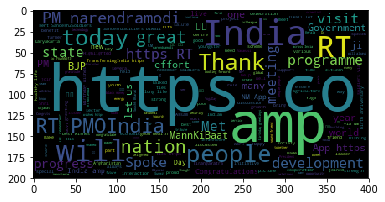

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

input_string = ' '.join(tweets['text'])
wc = WordCloud(background_color = "Black").generate(input_string)
plt.imshow(wc)

# 3. Clean the text column by converting all characters into lower case 

In [37]:
docs = tweets['text'].str.lower().str.replace('[^a-z ]', '')
docs.head(10)

0    the presidents address wonderfully encapsulate...
1    rashtrapati jis address to both houses of parl...
2    rt pmoindia empowering the marginalised httpst...
3    rt pmoindia commitment to welfare of farmers h...
4    rt pmoindia improving the quality of life for ...
5    rt pmoindia financial inclusion for poverty al...
6    rt rashtrapatibhvn the fourdecade old demand o...
7    rt rashtrapatibhvn my government has taken bol...
8    rt rashtrapatibhvn under its proactive act eas...
9    rt rashtrapatibhvn through standup india initi...
Name: text, dtype: object

# 4. Remove stopwords

In [11]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords[:5]

['i', 'me', 'my', 'myself', 'we']

#  5. Apply Stemming

In [12]:
stemmer = nltk.stem.PorterStemmer()

docs_clean = []
for doc in docs.head(2):
    words = doc.split(' ')
    #print(doc)
    #print(words)
    words_clean =[]
    for word in words:
        if word not in stopwords:
            words_clean.append(stemmer.stem(word))
    
    doc_clean = ' '.join(words_clean)
    docs_clean.append(doc_clean)
    print(docs_clean)
    #print(words_clean)
    print('-------------------------')

['presid address wonder encapsul india strength aspir potenti amp effort toward transformingindia']
-------------------------
['presid address wonder encapsul india strength aspir potenti amp effort toward transformingindia', 'rashtrapati ji address hous parliament indepth amp extens hear httpstcordkqtjgnnx rashtrapatibhvn']
-------------------------


In [38]:
docs=tweets['text'].str.lower().str.replace('[^a-z ]','')

def clean_senetence(text):
    words=text.split(' ')
    words_clean = [stemmer.stem(word) for word in words if word not in stopwords]
    return ' '.join(words_clean)
docs_clean = docs.apply(clean_senetence)
docs_clean.head()

0    presid address wonder encapsul india strength ...
1    rashtrapati ji address hous parliament indepth...
2        rt pmoindia empow marginalis httpstcowwsqgwdk
3    rt pmoindia commit welfar farmer httpstcopaafr...
4    rt pmoindia improv qualiti life poor httpstcou...
Name: text, dtype: object

# 6. Create DTM using Count Vectorizer 

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=5)
vectorizer.fit(docs_clean)
dtm = vectorizer.transform(docs_clean)
dtm

<3220x1229 sparse matrix of type '<class 'numpy.int64'>'
	with 24767 stored elements in Compressed Sparse Row format>

In [40]:
no_of_zeros = (3220 * 1229) - 24767
sparsity = (no_of_zeros) / (3220 * 1229) * 100
sparsity

99.37415663898842

In [41]:
df_dtm = pd.DataFrame(dtm.toarray(),
                     columns = vectorizer.get_feature_names())
(df_dtm == 0).sum().sum()

3932613

In [42]:
(3220 * 1229) - 3932613

24767

# 7. Fit the models and find the accuracy_score

In [43]:
from sklearn.model_selection import train_test_split
train_x, test_x = train_test_split(df_dtm, 
                               test_size = 0.2,
                              random_state = 100)

In [44]:
train_y = tweets.iloc[train_x.index]['retweeted']
test_y = tweets.iloc[test_x.index]['retweeted']

In [45]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 100, n_estimators = 300)
model.fit(train_x,train_y)

test_pred = model.predict(test_x)

df_pred = pd.DataFrame({'actual' : test_y,
                       'predicted' : test_pred})


df_pred['pred_status'] = df_pred['actual'] == df_pred['predicted']


df_pred[df_pred['pred_status']==True].shape[0] / df_pred.shape[0] *100

100.0

In [46]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 100)
model.fit(train_x,train_y)

test_pred = model.predict(test_x)

df_pred = pd.DataFrame({'actual' : test_y,
                       'predicted' : test_pred})


df_pred['pred_status'] = df_pred['actual'] == df_pred['predicted']


df_pred[df_pred['pred_status']==True].shape[0] / df_pred.shape[0] *100

100.0

In [47]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(random_state = 100)
model.fit(train_x,train_y)

test_pred = model.predict(test_x)

df_pred = pd.DataFrame({'actual' : test_y,
                       'predicted' : test_pred})


df_pred['pred_status'] = df_pred['actual'] == df_pred['predicted']


df_pred[df_pred['pred_status']==True].shape[0] / df_pred.shape[0] *100

100.0

In [48]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(train_x,train_y)

test_pred = model.predict(test_x)

df_pred = pd.DataFrame({'actual' : test_y,
                       'predicted' : test_pred})


df_pred['pred_status'] = df_pred['actual'] == df_pred['predicted']


df_pred[df_pred['pred_status']==True].shape[0] / df_pred.shape[0] *100

C:\Users\Name\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:461: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -


100.0

In [49]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(train_x,train_y)

test_pred = model.predict(test_x)

df_pred = pd.DataFrame({'actual' : test_y,
                       'predicted' : test_pred})


df_pred['pred_status'] = df_pred['actual'] == df_pred['predicted']


df_pred[df_pred['pred_status']==True].shape[0] / df_pred.shape[0] *100

100.0

# 8. Create word cloud for each group using K-Means Clustering

In [50]:
from sklearn.cluster import KMeans

km_model = KMeans(n_clusters=4)
km_model.fit(df_dtm)
labels = km_model.predict(df_dtm)
len(labels)

3220

In [51]:
words_clean_wc = docs
tweets_df = pd.DataFrame({'text':words_clean_wc,'cluster':labels})
tweets_df.head()

,cluster,text
0,2,the presidents address wonderfully encapsulate...
1,2,rashtrapati jis address to both houses of parl...
2,1,rt pmoindia empowering the marginalised httpst...
3,1,rt pmoindia commitment to welfare of farmers h...
4,1,rt pmoindia improving the quality of life for ...


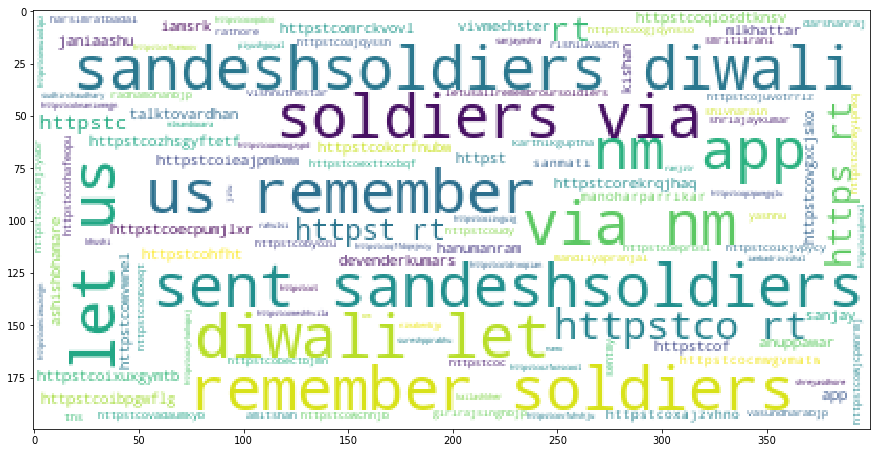

In [52]:
input_string1 = ' '.join(tweets_df[tweets_df['cluster']==0]['text'])
plt.figure(figsize=(15,10))
wc_cluster1 = WordCloud(background_color='white').generate(input_string1)
plt.imshow(wc_cluster1)

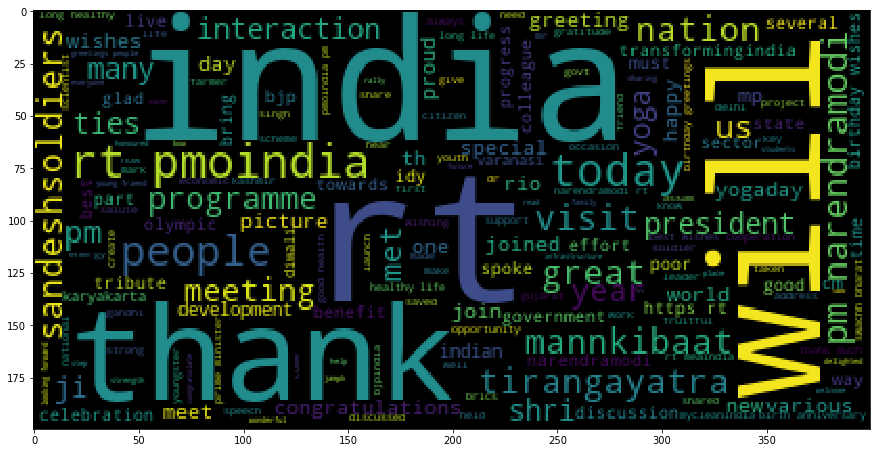

In [53]:
input_string2 = ' '.join(tweets_df[tweets_df['cluster']==1]['text'])
plt.figure(figsize=(15,10))
wc_cluster2 = WordCloud(background_color='black').generate(input_string2)
plt.imshow(wc_cluster2)

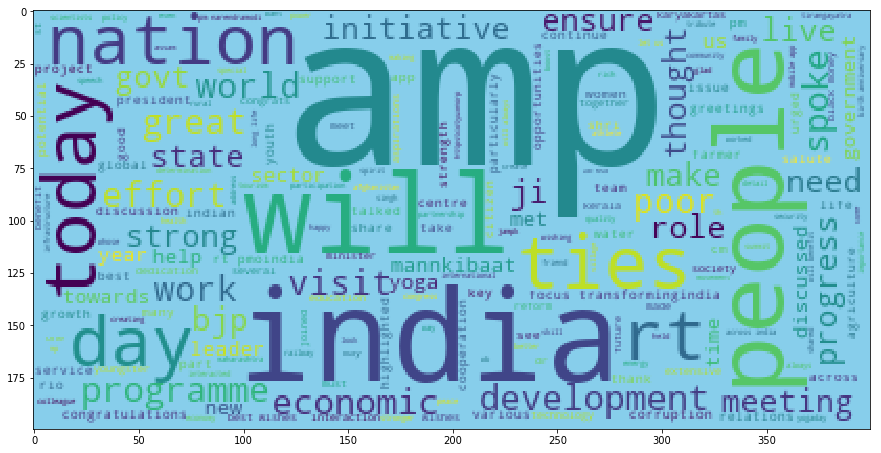

In [54]:
input_string3 = ' '.join(tweets_df[tweets_df['cluster']==2]['text'])
plt.figure(figsize=(15,10))
wc_cluster3 = WordCloud(background_color='skyblue').generate(input_string3)
plt.imshow(wc_cluster3)

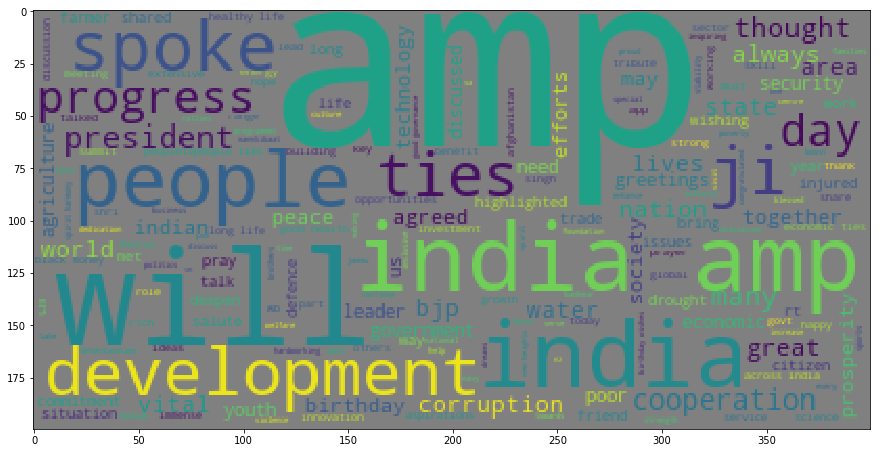

In [55]:
input_string4= ' '.join(tweets_df[tweets_df['cluster']==3]['text'])
plt.figure(figsize=(15,10))
wc_cluster4 = WordCloud(background_color='grey').generate(input_string4)
plt.imshow(wc_cluster4)